In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = np.empty((100, 2))
x[:, 0] = np.random.uniform(0., 100., size=100)
x[:, 1] = 0.75 * x[:, 0] + 3. + np.random.normal(0, 10., size=100)

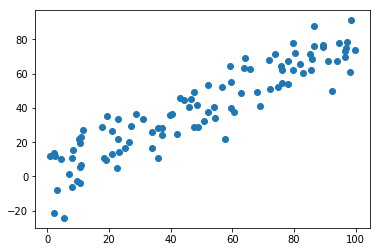

In [4]:
plt.scatter(x[:, 0], x[:, 1])
plt.show()

In [5]:
def demean(x):
    return x - np.mean(x, axis=0)

In [6]:
x_demean = demean(x)

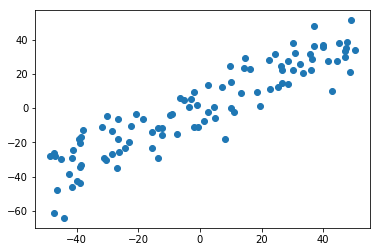

In [7]:
plt.scatter(x_demean[:, 0], x_demean[:, 1])
plt.show()

In [8]:
def f(w, x):
    return np.sum((x.dot(w) ** 2)) / len(x)

In [10]:
def df_math(w, x):
    return x.T.dot(x.dot(w)) * 2. / len(x)

In [11]:
def direction(w):
    return w / np.linalg.norm(w)

def gradient_ascent(df, x, initial_w, eta, n_iters=1e4, epsilon=1e-8):
    w = direction(initial_w)
    cur_iter = 0
    while cur_iter < n_iters:
        gradient = df(w, x)
        last_w = w
        w = w + eta * gradient
        w = direction(w)
        if (abs(f(w, x) - f(last_w, x)) < epsilon):
            break
        cur_iter += 1
    return w

In [16]:
initial_w = np.random.random(x.shape[1])
initial_w

array([0.47500683, 0.00755592])

In [14]:
eta = 0.001

In [23]:
w = gradient_ascent(df_math, x_demean, initial_w, eta)
w

array([0.76670041, 0.64200504])

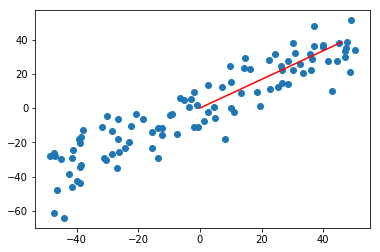

In [21]:
plt.scatter(x_demean[:, 0], x_demean[:, 1])
plt.plot([0, w[0] * 60], [0, w[1] * 60], color='r')
plt.show()

In [25]:
x2 = np.empty(x.shape)
for i in range(len(x)):
    x2[i] = x[i] - x[i].dot(w) * w

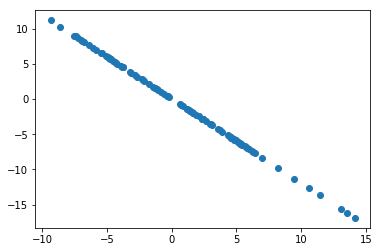

In [26]:
plt.scatter(x2[:, 0], x2[:, 1])
plt.show()

In [27]:
w2 = gradient_ascent(df_math, x2, initial_w, eta)
w2

array([ 0.64202142, -0.7666867 ])

In [28]:
w.dot(w2)

2.1361866830271747e-05

In [29]:
from sklearn.decomposition import PCA

H:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
H:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [30]:
pca = PCA(n_components=1)
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [31]:
pca.components_

array([[-0.76670003, -0.64200551]])

In [33]:
x_reduction = pca.transform(x)

In [34]:
x_reduction.shape

(100, 1)

In [35]:
x_restore = pca.inverse_transform(x_reduction)

In [36]:
x_restore.shape

(100, 2)

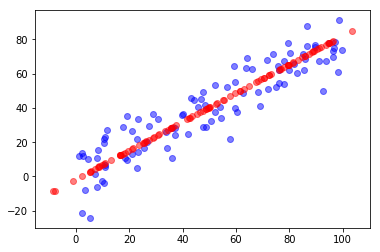

In [37]:
plt.scatter(x[:, 0], x[:, 1], color='b', alpha=0.5)
plt.scatter(x_restore[:, 0], x_restore[:, 1], color='r', alpha=0.5)
plt.show()

In [44]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [39]:
digits = datasets.load_digits()
x = digits.data
y = digits.target

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=666)

In [42]:
x_train.shape

(1347, 64)

In [58]:
pca = PCA(n_components=2)
pca.fit(x_train)
x_train_reduction = pca.transform(x_train)
x_test_reduction = pca.transform(x_test)

In [47]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train_reduction, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [48]:
knn_clf.score(x_test_reduction, y_test)

0.6066666666666667

In [50]:
pca = PCA(n_components=x_train.shape[1])
pca.fit(x_train)
pca.explained_variance_ratio_

array([1.45668166e-01, 1.37354688e-01, 1.17777287e-01, 8.49968861e-02,
       5.86018996e-02, 5.11542945e-02, 4.26605279e-02, 3.60119663e-02,
       3.41105814e-02, 3.05407804e-02, 2.42337671e-02, 2.28700570e-02,
       1.80304649e-02, 1.79346003e-02, 1.45798298e-02, 1.42044841e-02,
       1.29961033e-02, 1.26617002e-02, 1.01728635e-02, 9.09314698e-03,
       8.85220461e-03, 7.73828332e-03, 7.60516219e-03, 7.11864860e-03,
       6.85977267e-03, 5.76411920e-03, 5.71688020e-03, 5.08255707e-03,
       4.89020776e-03, 4.34888085e-03, 3.72917505e-03, 3.57755036e-03,
       3.26989470e-03, 3.14917937e-03, 3.09269839e-03, 2.87619649e-03,
       2.50362666e-03, 2.25417403e-03, 2.20030857e-03, 1.98028746e-03,
       1.88195578e-03, 1.52769283e-03, 1.42823692e-03, 1.38003340e-03,
       1.17572392e-03, 1.07377463e-03, 9.55152460e-04, 9.00017642e-04,
       5.79162563e-04, 3.82793717e-04, 2.38328586e-04, 8.40132221e-05,
       5.60545588e-05, 5.48538930e-05, 1.08077650e-05, 4.01354717e-06,
      

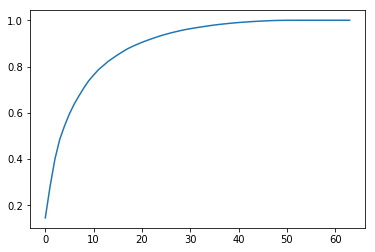

In [52]:
plt.plot([i for i in range(x_train.shape[1])],
        [np.sum(pca.explained_variance_ratio_[:i+1]) for i in range(x_train.shape[1])])
plt.show()

In [53]:
pca = PCA(0.95)
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [54]:
pca.n_components_

28

In [55]:
x_train_reduction = pca.transform(x_train)
x_test_reduction = pca.transform(x_test)

In [56]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train_reduction, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [57]:
knn_clf.score(x_test_reduction, y_test)

0.98

In [59]:
pca = PCA(n_components=2)
pca.fit(x)
x_reduction = pca.transform(x)

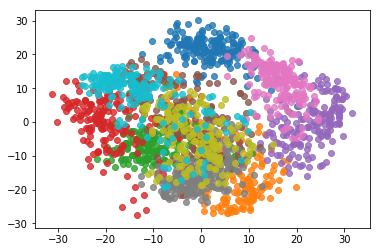

In [61]:
for i in range(10):
    plt.scatter(x_reduction[y == i, 0], x_reduction[y == i, 1], alpha=0.8)
plt.show()